# IMPORTS

In [1]:
import pandas as pd 
import numpy as np 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Intialize the start and end date to fetch data 
# Used datetime to set start and end datetime objects

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2018, 1, 1)

## Bank Codes:
* Bank of America - BAC
* CitiGroup       - C
* Goldman Sachs   - GS
* JPMorgan Chase  - JPM
* Morgan Stanley  - MS
* Wells Fargo     - WFC

In [4]:
# Created a list of Bank Codes

tickers = ['BAC', 'C', 'GS', 'JPM', "MS", 'WFC']

In [5]:
# Read data from Pickle file

bank_stocks = pd.read_pickle('Banks_data')

In [6]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# Exploratory Data Analysis (EDA)

In [7]:
bank_stocks.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Dtype  
---  ------         -----  
 0   (BAC, Open)    float64
 1   (BAC, High)    float64
 2   (BAC, Low)     float64
 3   (BAC, Close)   float64
 4   (BAC, Volume)  int64  
 5   (C, Open)      float64
 6   (C, High)      float64
 7   (C, Low)       float64
 8   (C, Close)     float64
 9   (C, Volume)    int64  
 10  (GS, Open)     float64
 11  (GS, High)     float64
 12  (GS, Low)      float64
 13  (GS, Close)    float64
 14  (GS, Volume)   int64  
 15  (JPM, Open)    float64
 16  (JPM, High)    float64
 17  (JPM, Low)     float64
 18  (JPM, Close)   float64
 19  (JPM, Volume)  int64  
 20  (MS, Open)     float64
 21  (MS, High)     float64
 22  (MS, Low)      float64
 23  (MS, Close)    float64
 24  (MS, Volume)   int64  
 25  (WFC, Open)    float64
 26  (WFC, High)    float64
 27  (WFC, Low)     float64
 28  (WFC, Close)   float64
 29  (W

In [8]:
# Having a look at some basic statistical details.

bank_stocks.describe()

Bank Ticker          BAC                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean           22.205217    22.479182    21.894076    22.174617  1.333590e+08   
std            15.308041    15.406193    15.197964    15.304852  1.274974e+08   
min             3.220000     3.510000     2.530000     3.140000  4.836000e+06   
25%            12.310000    12.450000    12.130000    12.270000  4.845598e+07   
50%            15.780000    15.970000    15.600000    15.790000  1.015867e+08   
75%            32.730000    33.600000    31.750000    32.630000  1.752694e+08   
max            55.040000    55.080000    54.820000    54.900000  1.226791e+09   

Bank Ticker            C                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean          145.661124   147.401685   143.602412   145.372658  2.859715e+07   
std           177.547336   178.987879   175.987635   177.409683  2.982102e+07   
min             4.550000     0.000000     4.500000     4.520000  6.328600e+05   
25%            39.500000    40.090000    38.780000    39.380000  1.008514e+07   
50%            49.430000    49.920000    48.890000    49.390000  2.183961e+07   
75%           197.400000   204.600000   190.400000   196.900000  3.878944e+07   
max           566.000000   570.000000   555.500000   564.100000  5.131787e+08   

Bank Ticker  ...           MS                                         \
Stock Info   ...         Open         High          Low        Close   
count        ...  2517.000000  2517.000000  2517.000000  2517.000000   
mean         ...    36.022133    36.559186    35.443925    36.006198   
std          ...    18.666122    18.815168    18.516753    18.669476   
min          ...     9.190000    10.210000     6.710000     9.200000   
25%          ...    23.800000    24.460000    23.270000    23.870000   
50%          ...    30.400000    30.790000    29.960000    30.340000   
75%          ...    40.110000    41.050000    39.590000    40.210000   
max          ...    90.770000    90.950000    88.330000    89.300000   

Bank Ticker                        WFC                                         \
Stock Info         Volume         Open         High          Low        Close   
count        2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   
mean         1.764023e+07    35.600727    36.015542    35.169110    35.598411   
std          1.690477e+07    10.010587     9.928720    10.105723    10.012581   
min          1.120500e+06     8.650000     8.940000     7.800000     8.120000   
25%          8.676259e+06    28.410000    28.990000    27.950000    28.490000   
50%          1.391242e+07    33.410000    33.890000    33.020000    33.500000   
75%          2.164847e+07    41.060000    41.420000    40.790000    41.220000   
max          3.297860e+08    58.730000    58.760000    58.070000    58.520000   

Bank Ticker                
Stock Info         Volume  
count        2.517000e+03  
mean         3.293280e+07  
std          3.572992e+07  
min          2.392000e+06  
25%          1.381537e+07  
50%          2.317952e+07  
75%          3.796472e+07  
max          4.787366e+08  

[8 rows x 30 columns]

In [9]:
# Shape of the data (Rows, Columns)

bank_stocks.shape

(2517, 30)

In [10]:
# The maximum Close price for each bank's stock throughout the time period.
# Using .xs cross section

bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [11]:
# Created a new empty DataFrame called returns
# This dataframe will contain the returns for each bank's stock.

returns = pd.DataFrame()

In [12]:
# For each bank stock ticker, used pandas pct_change() method to find the percentange change.

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [13]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


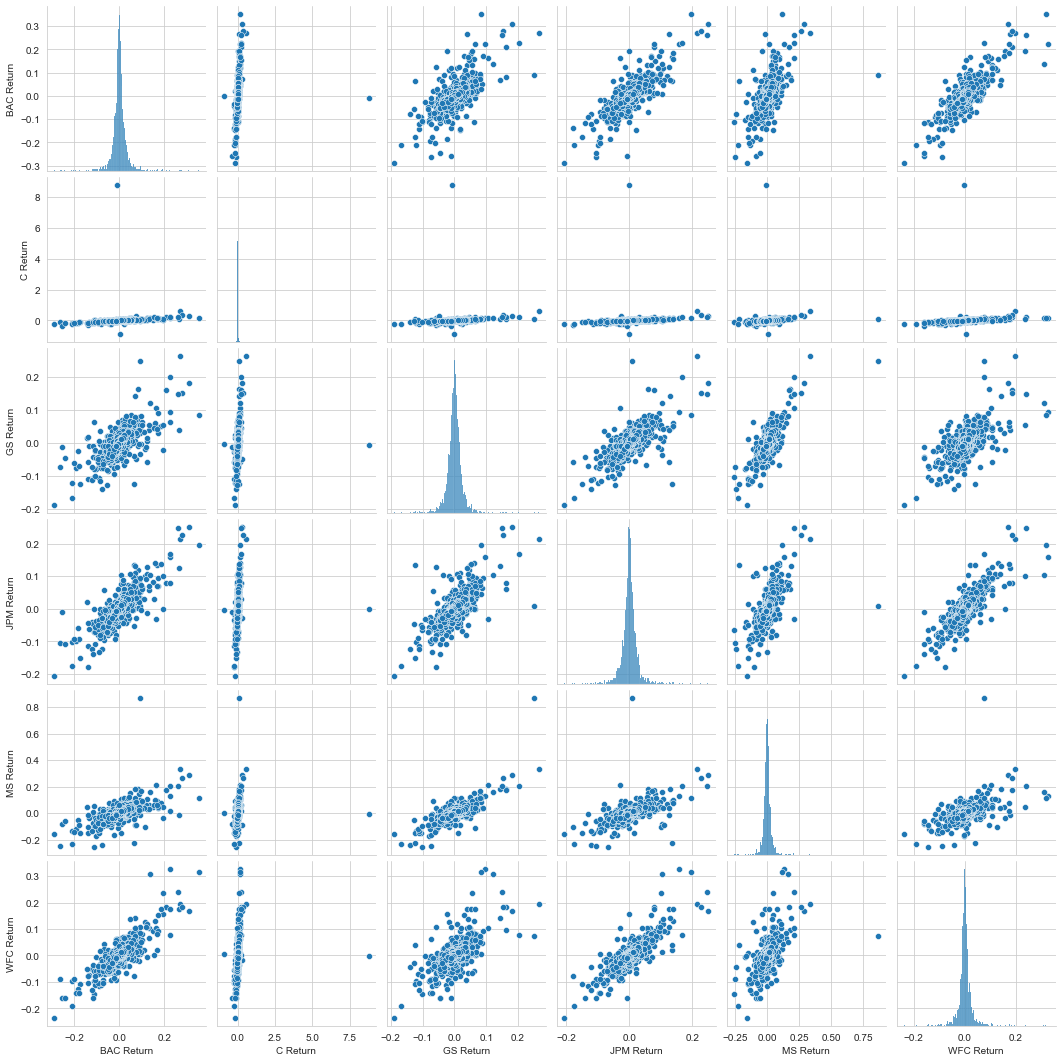

In [14]:
# Creating the pairplot for returns of the bank

sns.pairplot(returns[1:])
plt.show()

# Here, Citigroup's Stock stands out.
# In 2008 Citi Group Stock shares falling and dropping the company's market capitalization to US 6 billion, down from US 300 billion two years prior and by november 2008 Citigroup was insolvent.

In [15]:
# Worst Drop (4 of them on Inauguration day)

returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
# Best Single Day Gain
# Citigroup stock split in May 2011, but also JPM day after inauguration.
# Citigroup's largest drop and biggest gain were very close to one another.
# Citigroup announced the effectiveness of its 1-for-10 reverse stock split of Citigroup common stock.

returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [17]:
# Calculated the standard deviation of the returns which indicates the risk
# Overall riskiest over the entire time period

returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

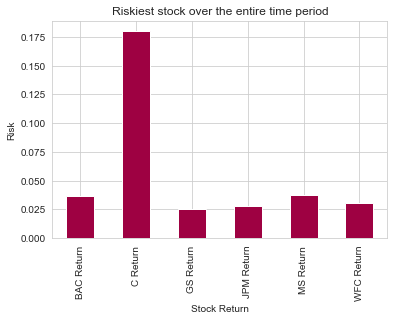

In [18]:
returns.std().plot(kind = 'bar', colormap = 'Spectral')
plt.ylabel("Risk")
plt.xlabel("Stock Return")
plt.title("Riskiest stock over the entire time period")
plt.show()

From the above analysis, we have seen that Citi group has highest standard deviation and Hence, it is classified as the highest riskiest stock of the entire period.

In [19]:
# Riskiest at 2015
# Very similar risk profiles, but Morgan Stanley or BofA
    
returns.loc['2015-01-01' : '2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

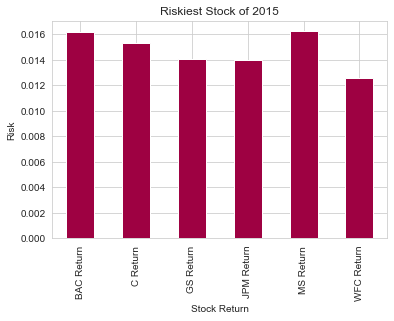

In [20]:
returns.loc['2015-01-01' : '2015-12-31'].std().plot(kind = 'bar', colormap = 'Spectral')
plt.ylabel("Risk")
plt.xlabel("Stock Return")
plt.title("Riskiest Stock of 2015")
plt.show()

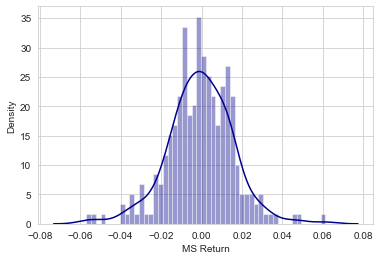

In [21]:
# Created a distplot using seaborn of the 2015 returns for Morgan Stanley

sns.distplot(returns.loc['2015-01-01' : '2015-12-31']['MS Return'],bins = 50, color= 'darkblue')
plt.show()

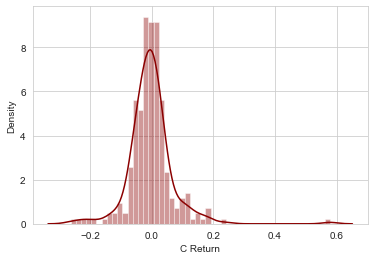

In [22]:
# Create a distplot using seaborn of the 2008 returns for CitiGroup

sns.distplot(returns.loc['2008-01-01' : '2008-12-31']['C Return'],color='darkred', bins=50)
plt.show()

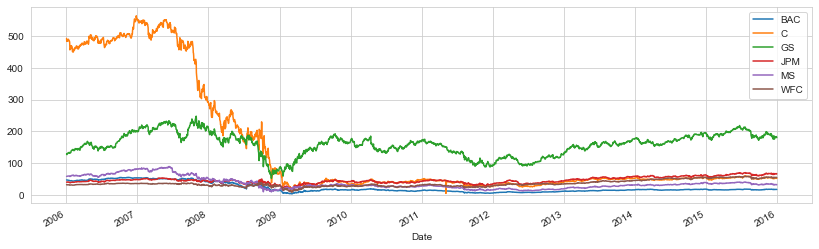

In [23]:
# Created a line plot showing Close price for each bank for the entire index of time.
# Here, we will loop through all the banks and Plot the close price for each bank into a single plot.

for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (14,4))
plt.legend()
plt.show()

In [24]:
bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


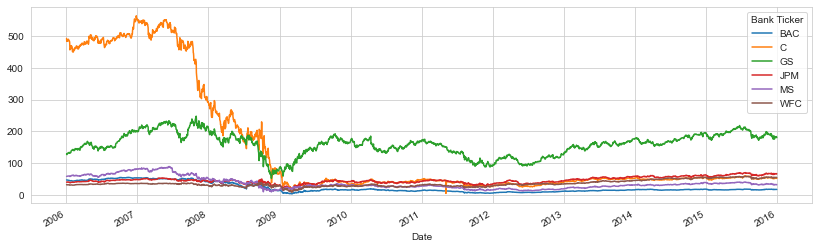

In [25]:
# Here, we will use pandas .xs to get a cross section of the data.

bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').plot(figsize = (14,4))
plt.show()

In [26]:
# Plotly Chart with Pandas and Cufflinks

bank_stocks.xs(key = 'Close',axis=1,level='Stock Info').iplot()

From the time series plot we have seen that Citi Group is the worst effected bank during the financial crisis and Goldman Sachs is the least affected bank during the financial crisis

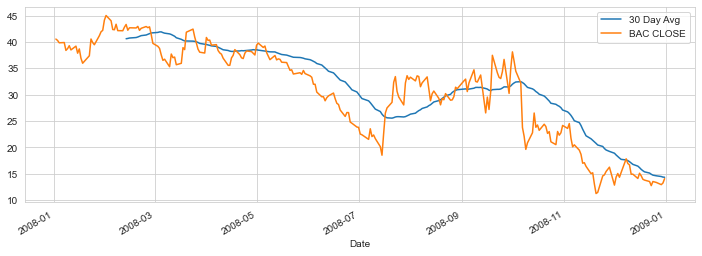

In [27]:
# Ploted the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01' : '2009-01-01'].rolling(window = 30).mean().plot(label = "30 Day Avg")
bank_stocks['BAC']['Close'].loc['2008-01-01': '2009-01-01'].plot(label = "BAC CLOSE")
plt.legend()
plt.show()

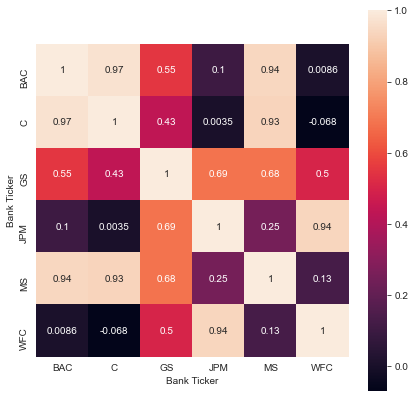

In [28]:
# Created a heatmap of the correlation between the stocks Close Price.

plt.subplots(figsize=(7,7))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, square=True)
plt.show()

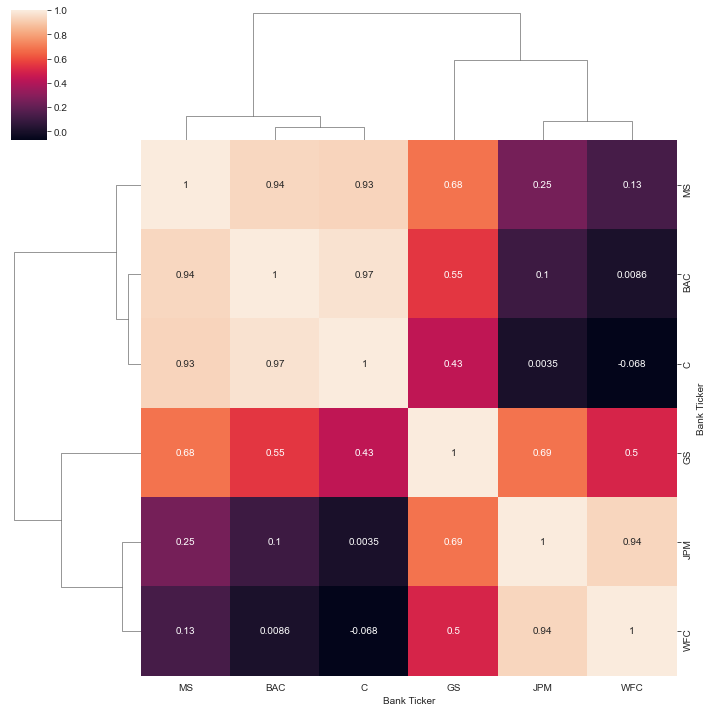

In [29]:
# Used seaborn's clustermap to cluster the correlations together 

sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

In [30]:
# Plotly Chart with Pandas and Cufflinks - Heatmap

close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [31]:
bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].head()

Stock Info,Open,High,Low,Close
Date,,,,
2015-01-02,17.99,18.03,17.68,17.90
2015-01-05,17.78,17.81,17.29,17.38
2015-01-06,17.42,17.44,16.78,16.86
2015-01-07,17.14,17.18,16.87,16.94
2015-01-08,17.16,17.34,17.10,17.29


In [32]:
# Plotly Chart with Pandas and Cufflinks
# Used .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

bac15 = bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind = 'candle')

In [33]:
# Plotly Chart with Pandas and Cufflinks
# Used .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [34]:
# Plotly Chart with Pandas and Cufflinks
# Used .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')